<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Goal" data-toc-modified-id="Project-Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Goal</a></span></li><li><span><a href="#Reading-files" data-toc-modified-id="Reading-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading files</a></span><ul class="toc-item"><li><span><a href="#Testing-if-samples-are-representative" data-toc-modified-id="Testing-if-samples-are-representative-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Testing if samples are representative</a></span></li><li><span><a href="#Verifying-representativeness-of-2nd-sample" data-toc-modified-id="Verifying-representativeness-of-2nd-sample-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Verifying representativeness of 2nd sample</a></span></li></ul></li><li><span><a href="#Isolating-datasets-for-new-goal" data-toc-modified-id="Isolating-datasets-for-new-goal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Isolating datasets for new goal</a></span><ul class="toc-item"><li><span><a href="#Analyzing-Distribution-shapes" data-toc-modified-id="Analyzing-Distribution-shapes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Analyzing Distribution shapes</a></span></li><li><span><a href="#Analyzing-Frequency-Distrbutions-for-more-granularity" data-toc-modified-id="Analyzing-Frequency-Distrbutions-for-more-granularity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analyzing Frequency Distrbutions for more granularity</a></span></li><li><span><a href="#Comparing-Mean,-Median,-Mode" data-toc-modified-id="Comparing-Mean,-Median,-Mode-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Comparing Mean, Median, Mode</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Project Goal

* Walt Hickey [analyzed](https://fivethirtyeight.com/features/fandango-movies-ratings/) fandango's movie ratings by comparing the actual unrounded ratings in the HTML and the displayed ratings to website visitors and found that they have rounded up movies ratings to the nearest half star (4.1->4.5) or the full star (4.5->5). There were also examples of rounding (4->5)

* The goal of the project is to look at more recent ratings data to see if fandango has changed their ratings system after Hickey's analysis. 

# Reading files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.ion()
import seaborn as sns

before = pd.read_csv('fandango_score_comparison.csv', usecols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'])
after = pd.read_csv('movie_ratings_16_17.csv', usecols = ['movie', 'year', 'fandango'])

## Testing if samples are representative

In [2]:
def get_year(row):
    return row.split()[-1]

print(before.FILM.apply(get_year).value_counts(),end='\n\n')  


print(after.year.value_counts())

(2015)    129
(2014)     17
Name: FILM, dtype: int64

2016    191
2017     23
Name: year, dtype: int64


The population of interest is made of all the movie ratings stored on Fandango's website, regardless of the releasing year or the number of reviews a movie gets.

**FIRST SAMPLE**
Hickey's fandango_score_comparison.csv dataset had two sampling criteria:

1. had tickets on sale in 2015
2. had 30 or more reviews on fandango 

This is not be a representative sample of the population of movies because the choice is not random and not every movie had an equal chance of being selected. Those movies that were released 2014 but stopped selling tickets in 2015 would be excluded. Those that had less than 30 reviews similarly would be excluded. He scraped 510 movies that had tickets on sale in 2015, then cut down to only 209 films that have 30 or more user ratings. This means that only the more popular (in terms of number of people bothering to rate it) movies are selected for analysis. The samples are also subjected to temporal trends, where movies in year 2015 could have been outstandingly good or bad compared to other years, possibly due to the coincidence of other events in the country which influenced the release dates, or the availability of directors/cast which affected movie quality.  

**SECOND SAMPLE**

The sampling criteria for the second sample:

1. released in 2016 and 2017
2. significant number of votes (number for significance unspecified)

The second sample is similarly exposed to temporal trends and the popularity problem described above
From the `value_counts()` on both samples, we see that there are much more examples of movies from 2015 than 2014 in the 1st sample, and much more movies from 2016 than 2017 in the 2nd sample. Focusing on the years 2015, 2016 with higher sample sizes would be probably be more representative of the movies from years 2015, 2016 in the population compared to using the smaller sample sizes of 2014,2017 to infer the population. 

**Way Forward to representativeness:** 
1. collect new data
2. change the goal

Placing limitations on the goal is much faster than collecting new data, so the new question is to see if fandango has changed their ratings system FOR POPULAR MOVIES IN 2016 after Hickey's analysis of POPULAR MOVIES IN 2015.   

To be precise, popular is defined as having 30 or more ratings on fandango

With a new goal, the populations of interest have changed to:
1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

In [3]:
before.Fandango_votes.value_counts().sort_index()  # as a check, all movies in 1st sample have 30 or more ratings

sample2 = after.sample(10, random_state = 1)   #to check if sample 2 contains popular movies, sample 10 and manually check from website

In [4]:
sample2

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


 ## Verifying representativeness of 2nd sample

In [5]:
pd.Series(data = [2247,7271,493,5263,13400,17,127,11877,500,35057],index=sample2.movie)

movie
Mechanic: Resurrection                      2247
Warcraft                                    7271
Max Steel                                    493
Me Before You                               5263
Fantastic Beasts and Where to Find Them    13400
Cell                                          17
Genius                                       127
Sully                                      11877
A Hologram for the King                      500
Captain America: Civil War                 35057
dtype: int64

Looking a random sample, 9/10 movies have more than 30 reviews so we can be confident that the 2nd sample is sufficient representative of the population of "All Fandango's ratings for popular movies released in 2016."

# Isolating datasets for new goal 

In [45]:
before['year'] = before.FILM.str[-5:-1]     #vectorized function faster than apply/map in python which loops
before_2015 = before[before.year == '2015']    #make copies to avoid any SettingWithCopyWarning later on?

after_2016 = after[after.year == 2016]         #make copies to avoid any SettingWithCopyWarning later on?

print(after_2016.year.value_counts())    #verifying row filtering done correctly
print(before_2015.year.value_counts())

2016    191
Name: year, dtype: int64
2015    129
Name: year, dtype: int64


In [65]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


(0, 5)

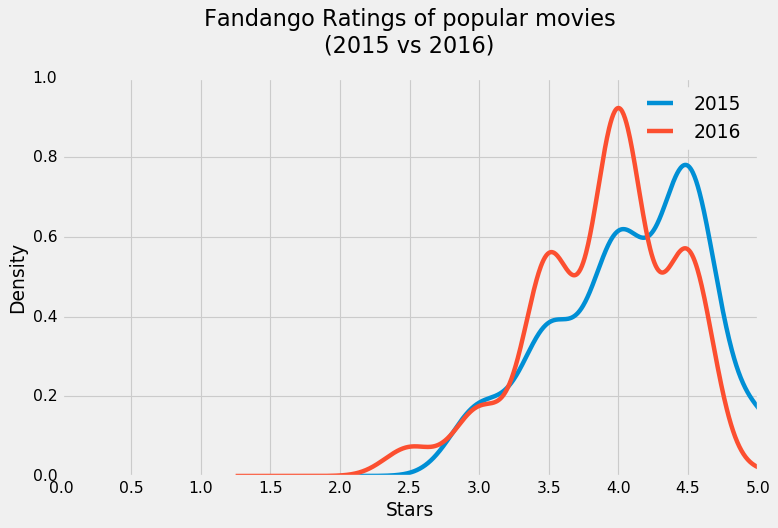

In [150]:
plt.ion()   
plt.figure(figsize = (10,6))
plt.style.use('fivethirtyeight')

before_2015.Fandango_Stars.plot.kde(label = '2015', legend = True)
after_2016.fandango.plot.kde(label = '2016', legend = True)


plt.title('Fandango Ratings of popular movies\n(2015 vs 2016)',y = 1.05)  # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xticks(np.arange(0,5.1,.5))
plt.xlim(0,5)   #to cut up the kde to realistic limits

## Analyzing Distribution shapes

We can see that both distributions are left skewed, with the 2016 distribution slightly more symmetrical compared to the 2015 one. The left skew shows that fandango ratings are generally very high compared to other rating agencies. These ratings may have been influenced by the fact that Fandango sells tickets too. 

The peak density of 2015 movies occur at a higher rating of 4.5 stars than the peak of 2016 at 4 stars. 
This is evidence that fandango's ratings for popular movies are generally lowered in 2016 compared to 2015

## Analyzing Frequency Distrbutions for more granularity

2015 has 129 samples while 2016 has 191, absolute numbers is inconvenient for interpretation --> try proportions/percentages

In [109]:
dist_2015 = before_2015.Fandango_Stars.value_counts(normalize=True).sort_index(ascending=False)*100
dist_2016 = after_2016.fandango.value_counts(normalize=True).sort_index(ascending=False)*100
print("2015\n"+'-'*16+'\n',dist_2015)

print()

print("2016\n"+'-'*16+'\n',dist_2016)

2015
----------------
 5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

2016
----------------
 5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64


The minimum rating for 2016 was 2.5, lower than the minmum of 3 in 2015. The percentage of 5 stars reduced from 7% to less than 1%. Similarly for 4 stars, it reduced 13% from 38% to 25%. For lower ratings of 3.5 and 4 stars, the % went up significantly in 2016 compared to 2015, which challenges the direction of change seen in the KDE plot. 

## Comparing Mean, Median, Mode

In [121]:
mean_2015 = before_2015.Fandango_Stars.mean()
median_2015 = before_2015.Fandango_Stars.median()
mode_2015 = before_2015.Fandango_Stars.mode()[0]

mean_2016 = after_2016.fandango.mean()
median_2016 = after_2016.fandango.median()
mode_2016 = after_2016.fandango.mode()[0]


summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


From 2015 to 2016, the mean has reduced by about 0.2 stars , the median remained the same while the mode reduced bt 0.5 stars. The difference in means is rather small.

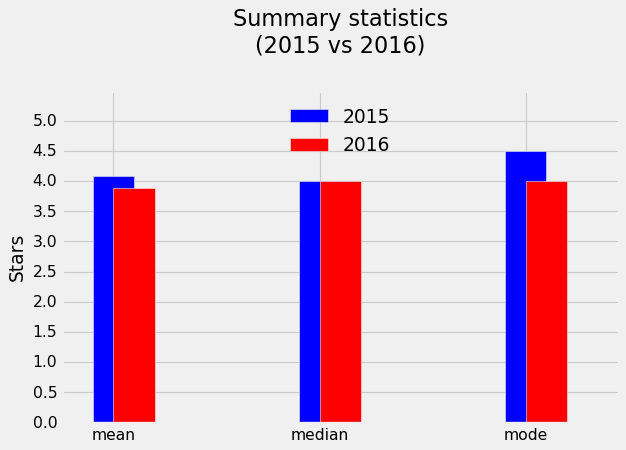

In [169]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'b', align = 'center', label = '2015', width = 0.2)
summary['2016'].plot.bar(color = 'r', align = 'edge', label = '2016', width = .2,figsize = (8,5), rot = 0)

plt.title('Summary statistics\n(2015 vs 2016)', y = 1.1)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha =0, loc = 'upper center')

# Conclusion

The analysis of KDEs, the more granular frequency distribution tables and the summary statistics show that Fandango indeed has lower ratings on average (0.2) for it's popular movies rated from 2015 to 2016.

Possible explanations could be Fandango changing it's rounding practices which reduced the amount and degree of rounding up done to avoid seeming too inflated compared to other rating agencies because Hickey pointed out the issue.  